# Final Project

Ok, so today we'll be working with the transactions, product, and hh_demographic tables in the project_data folder.

* First, read in the transactions data.

* Read in the only columns `household_key`, `BASKET_ID`, `DAY`, `PRODUCT_ID`, `QUANTITY`, and `SALES_VALUE`.

* Convert `DAY`, `QUANTITY`, and `PRODUCT_ID` to the smallest appropriate integer types.


In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.getcwd()

'/Users/tim/Documents/Github/analyze_this/Scripts'

In [ ]:

# Exercise path
# Working from the Scripts folder as the base path
exercise_path = '../Python/Exercise Files/Pandas Course Resources/Pandas Course Resources/project_data/'

# Keep just a subest of columns for the transactions data
keep_cols = ["household_key", "BASKET_ID", "DAY", "PRODUCT_ID", "QUANTITY", "SALES_VALUE"]
dtype_cols = {"DAY":"Int16", "QUANTITY":"Int32", "PRODUCT_ID":"Int32"}

trans_df = pd.read_csv(os.path.join(exercise_path, "project_transactions.csv"), usecols = keep_cols, dtype = dtype_cols )
#hh_df = pd.read_csv(os.path.join(exercise_path, "hh_demographic.csv"))
#products_df = pd.read_csv(os.path.join(exercise_path, "product.csv"))

In [4]:
# Describe the data
trans_df.info(memory_usage= "deep")
trans_df.describe(include = "all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  int64  
 1   BASKET_ID      int64  
 2   DAY            Int16  
 3   PRODUCT_ID     Int32  
 4   QUANTITY       Int32  
 5   SALES_VALUE    float64
dtypes: Int16(1), Int32(2), float64(1), int64(2)
memory usage: 75.7 MB


,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE
count,2.146311e+06,2.146311e+06,2146311.0,2146311.0,2146311.0,2.146311e+06
mean,1.056232e+03,3.404897e+10,389.505895,2884714.93574,100.970275,3.105908e+00
std,6.050059e+02,4.723748e+09,190.052966,3831949.290752,1152.364419,4.186300e+00
min,1.000000e+00,2.698490e+10,1.0,25671.0,0.0,0.000000e+00
25%,5.480000e+02,3.040798e+10,229.0,917231.0,1.0,1.290000e+00
50%,1.042000e+03,3.281176e+10,392.0,1027960.0,1.0,2.000000e+00
75%,1.581000e+03,4.012804e+10,555.0,1132771.0,1.0,3.490000e+00
max,2.099000e+03,4.230536e+10,711.0,18316298.0,89638.0,8.400000e+02


In [ ]:
#trans_df = trans_df.astype({"DAY":"Int16", "QUANTITY":"Int32", "PRODUCT_ID":"Int32"})
#trans_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  int64  
 1   BASKET_ID      int64  
 2   DAY            Int16  
 3   PRODUCT_ID     Int32  
 4   QUANTITY       Int32  
 5   SALES_VALUE    float64
dtypes: Int16(1), Int32(2), float64(1), int64(2)
memory usage: 75.7 MB


In [5]:
# Use the following snippet to create a Date Column.

trans_df = (
    trans_df
    .assign(date = (pd.to_datetime("2016", format='%Y') 
                    + pd.to_timedelta(trans_df["DAY"].sub(1).astype(str) + " days"))
           )
    .drop(["DAY"], axis=1)
)

In [6]:
trans_df.describe(include = "all")
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   household_key  int64         
 1   BASKET_ID      int64         
 2   PRODUCT_ID     Int32         
 3   QUANTITY       Int32         
 4   SALES_VALUE    float64       
 5   date           datetime64[ns]
dtypes: Int32(2), datetime64[ns](1), float64(1), int64(2)
memory usage: 86.0 MB


## TIME BASED ANALYSIS

* Plot the sum of sales by month. Are sales growing over time?
* Next, plot the same series after filtering down to dates April 2016 and October 2017.
* Then, plot the sum of monthly sales in 2016 vs the monthly sales 2017.
* Finally, plot total sales by day of week.

/var/folders/y7/p6k2fh7s3rz0qzq7d9hkljkw0000gn/T/ipykernel_14937/4253033682.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


<Axes: xlabel='date'>

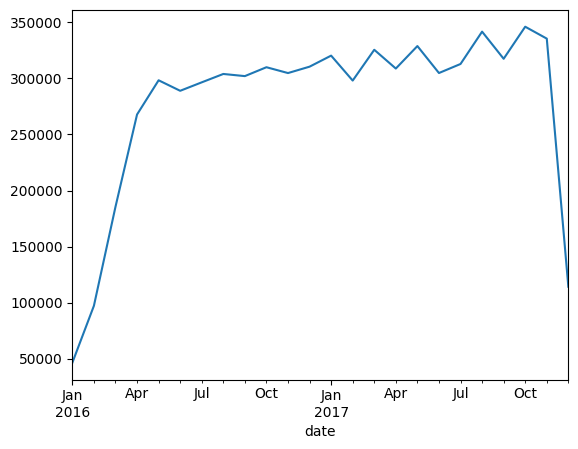

In [7]:
# Plot the sum of sales by month. Sales appear to be growing over time
# Set a date index, graby the sales column, and calculate a monthly sum using resampling.
# Then build the default line plot
(trans_df
 .set_index("date")
 .loc[:, "SALES_VALUE"]
 .resample("M")
 .sum()
 .plot())

In [8]:
#* Next, plot the same series after filtering down to dates April 2016 and October 2017.

<Axes: xlabel='date'>

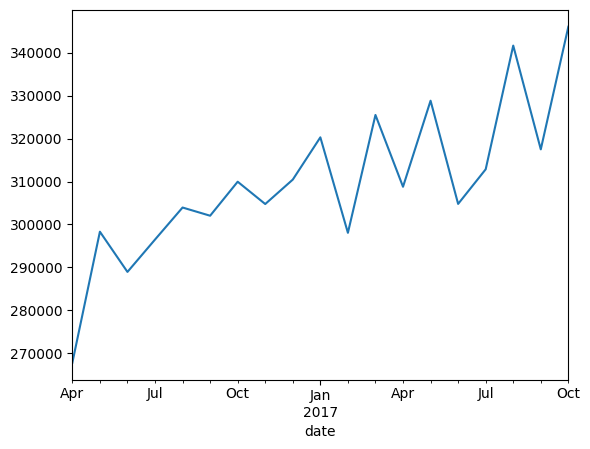

In [ ]:
(trans_df
 .set_index("date")
 .sort_index() # Have to sort the index to get the slicing to work as desired
 .loc["2016-04":"2017-10", "SALES_VALUE"]
 .resample("ME")
 .sum()
 .plot())

<Axes: xlabel='month'>

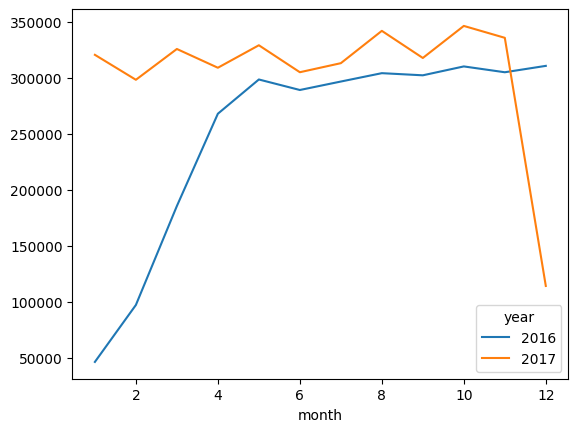

In [ ]:
# Monthly sales in 2016 versus monthly sales in 2017
(trans_df
.groupby([trans_df["date"].dt.month.rename("month"), trans_df["date"].dt.year.rename("year")])
.agg({"SALES_VALUE":"sum"})
.reset_index()
.pivot(index = "month", 
       columns = "year",
       values = "SALES_VALUE")
.plot()
)

# More efficient way
#(transactions
# .set_index("date")
# .loc[:, ["SALES_VALUE"]]
# .resample("M")
# .sum()
# .assign(year_prior = lambda x: x["SALES_VALUE"].shift(12))
# .loc["2017"]
# .plot()
#)


# DEMOGRAPHICS

* Read in the `hh_demographic.csv` file, but only the columns `AGE_DESC`, `INCOME_DESC`, `household_key`, and `HH_COMP_DESC`. Convert the appropriate columns to the category dtype.

* Then group the transactions table by household_id, and calculate the sum of SALES VALUE by household.


* Once you've done that, join the demographics DataFrame to the aggregated transactions table. Since we're interested in analyzing the demographic data we have, make sure not to include rows from transactions that don't match.


* Plot the sum of sales by age_desc and income_desc (in separate charts).


* Then, create a pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`. Which of our demographics have the highest average sales?


In [42]:
# Only read-in the following columns
hh_cols = ["AGE_DESC", "INCOME_DESC", "household_key", "HH_COMP_DESC"]
hh_cats = {"AGE_DESC":"category", "INCOME_DESC":"category", "HH_COMP_DESC":"category"}

hh_df = pd.read_csv(os.path.join(exercise_path, "hh_demographic.csv"), usecols=hh_cols, dtype = hh_cats)

In [43]:
hh_df[["AGE_DESC", "INCOME_DESC", "HH_COMP_DESC"]].value_counts()
hh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   AGE_DESC       801 non-null    category
 1   INCOME_DESC    801 non-null    category
 2   HH_COMP_DESC   801 non-null    category
 3   household_key  801 non-null    int64   
dtypes: category(3), int64(1)
memory usage: 9.5 KB


In [63]:
#Then group the transactions table by household_id, and calculate the sum of SALES VALUE by household.
# Need to merge with the transactions data 1:M join
#hh_merged = pd.merge(hh_df, trans_df, how = "left", on = "household_key")
#hh_merged.describe(include = "all")
#hh_merged.columns
hh_sales = trans_df.groupby(trans_df["household_key"]).agg({"SALES_VALUE":"sum"}).reset_index()
hh_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   household_key  2099 non-null   int64  
 1   SALES_VALUE    2099 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 32.9 KB


In [110]:
hh_merged = hh_df.merge(hh_sales, how = "inner", on = "household_key")
hh_merged.shape

(668, 5)

/var/folders/y7/p6k2fh7s3rz0qzq7d9hkljkw0000gn/T/ipykernel_14937/1435269266.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(hh_merged["AGE_DESC"])


<Axes: ylabel='AGE_DESC'>

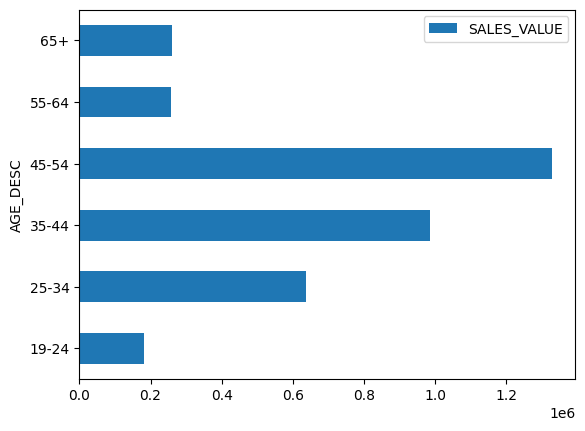

In [111]:
#* Plot the sum of sales by age_desc and income_desc (in separate charts).
(hh_merged
    .groupby(hh_merged["AGE_DESC"])
    .agg({"SALES_VALUE":"sum"})
    #.sort_values("SALES_VALUE", ascending=True)
    .plot.barh()
)



/var/folders/y7/p6k2fh7s3rz0qzq7d9hkljkw0000gn/T/ipykernel_14937/407653768.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(hh_merged["INCOME_DESC"])


<Axes: ylabel='INCOME_DESC'>

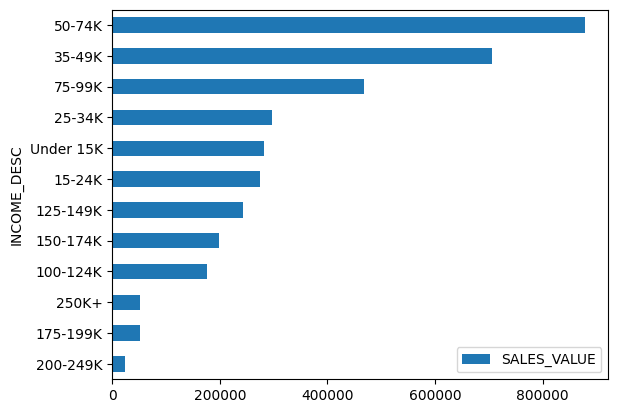

In [112]:
(hh_merged
    .groupby(hh_merged["INCOME_DESC"])
    .agg({"SALES_VALUE":"sum"})
    .sort_values("SALES_VALUE", ascending=True)
    .plot.barh()
)

/var/folders/y7/p6k2fh7s3rz0qzq7d9hkljkw0000gn/T/ipykernel_14937/716139116.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  hh_merged.pivot_table(index = "AGE_DESC",


<Axes: xlabel='AGE_DESC'>

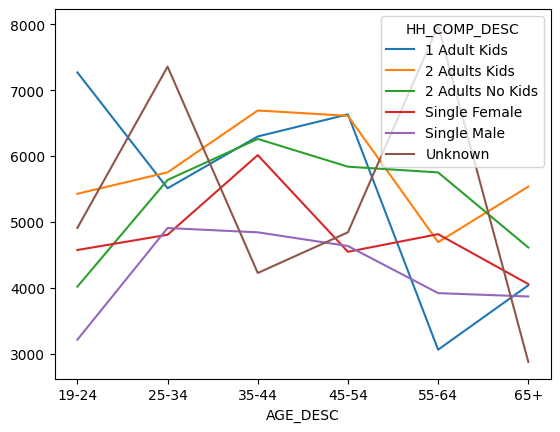

In [85]:
#* Then, create a pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`. 
# Which of our demographics have the highest average sales?
hh_merged.pivot_table(index = "AGE_DESC", 
                      columns= "HH_COMP_DESC",
                      values = "SALES_VALUE",
                      aggfunc = "mean").round(2).plot()#subplots=True)

In [114]:
hh_merged.pivot_table(index = "AGE_DESC", 
                      columns= "HH_COMP_DESC",
                      values = "SALES_VALUE",
                      aggfunc = "mean", margins = True).round(2).style.background_gradient(cmap="RdYlGn", axis=None)

/var/folders/y7/p6k2fh7s3rz0qzq7d9hkljkw0000gn/T/ipykernel_14937/688216224.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  hh_merged.pivot_table(index = "AGE_DESC",


HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown,All
AGE_DESC,,,,,,,
19-24,7268.800000,5428.940000,4020.800000,4576.100000,3216.840000,4911.270000,4692.080000
25-34,5512.200000,5753.970000,5638.520000,4807.440000,4909.520000,7356.270000,5435.520000
35-44,6297.740000,6691.770000,6260.410000,6015.190000,4844.190000,4227.690000,6090.560000
45-54,6632.570000,6610.480000,5839.530000,4549.370000,4636.640000,4844.000000,5534.880000
55-64,3064.870000,4695.660000,5752.410000,4816.150000,3922.550000,7973.750000,5168.920000
65+,4040.810000,5536.870000,4614.110000,4059.700000,3871.560000,2879.290000,4340.940000
All,6032.800000,6280.070000,5599.860000,4895.930000,4544.650000,4936.130000,5468.400000


In [116]:
# Delete data frames not being used
del [hh_sales]

# PRODUCT DEMOGRAPHICS

* Read in the product csv file.

* Only read in product_id and department from product (consider converting columns).

* Join the product DataFrame to transactions and demographics tables, performing an inner join when joining both tables.

* Finally, pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales. Which category does our youngest demographic perform well in?



In [117]:
# Read in the products CSV, keeping only product ID and department
products_df = pd.read_csv(os.path.join(exercise_path, "product.csv"), usecols = ["PRODUCT_ID", "DEPARTMENT"], dtype ={"PRODUCT_ID":"Int32", "DEPARTMENT":"category"})
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   PRODUCT_ID  92353 non-null  Int32   
 1   DEPARTMENT  92353 non-null  category
dtypes: Int32(1), category(1)
memory usage: 542.7 KB


In [118]:
# Join all three tables together with an inner join
# Join product on product_id (only shared column)
trans_demo_dept = (trans_df
                  .merge(hh_df, 
                         how="inner",
                         left_on='household_key',
                         right_on="household_key",)
                  .merge(products_df,
                         how="inner",
                         left_on="PRODUCT_ID",
                         right_on="PRODUCT_ID")
             
             )
trans_demo_dept.describe()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date
count,1.161575e+06,1.161575e+06,1161575.0,1161575.0,1.161575e+06,1161575
mean,1.036454e+03,3.418581e+10,2942015.705818,115.260996,3.144774e+00,2017-01-30 07:08:10.346298112
min,1.000000e+00,2.698490e+10,25671.0,0.0,0.000000e+00,2016-01-01 00:00:00
25%,4.920000e+02,3.062750e+10,918400.0,1.0,1.290000e+00,2016-08-28 00:00:00
50%,9.930000e+02,3.293251e+10,1029199.0,1.0,2.090000e+00,2017-02-04 00:00:00
75%,1.566000e+03,4.018639e+10,1133254.0,1.0,3.490000e+00,2017-07-11 00:00:00
max,2.097000e+03,4.230271e+10,18316298.0,89638.0,8.400000e+02,2017-12-11 00:00:00
std,6.141840e+02,4.687853e+09,3878748.839471,1248.375485,4.261599e+00,NaN


In [120]:
# PIVOT by AGES_DESC and DEPARTMENT, calculating sum of sales
trans_demo_dept.pivot_table(index = "DEPARTMENT",
                            columns= "AGE_DESC", 
                            values = "SALES_VALUE", 
                            aggfunc= "sum",
                            ).style.background_gradient(cmap="RdYlGn", axis=1)

/var/folders/y7/p6k2fh7s3rz0qzq7d9hkljkw0000gn/T/ipykernel_14937/113788927.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  trans_demo_dept.pivot_table(index = "DEPARTMENT",


AGE_DESC,19-24,25-34,35-44,45-54,55-64,65+
DEPARTMENT,,,,,,
,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AUTOMOTIVE,11.640000,21.250000,72.580000,55.920000,0.000000,16.370000
CHARITABLE CONT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CHEF SHOPPE,81.300000,134.160000,348.530000,418.240000,80.860000,149.240000
CNTRL/STORE SUP,2.000000,0.000000,1.000000,9.950000,2.000000,0.100000
COSMETICS,698.630000,2273.030000,4362.020000,5187.570000,986.260000,600.900000
COUP/STR & MFG,7.490000,48.420000,121.200000,154.550000,40.680000,20.490000
DAIRY DELI,3.800000,3.850000,7.390000,16.750000,3.140000,1.940000
DELI,4043.300000,18181.940000,34577.290000,44334.220000,9850.540000,10462.330000


# EXPORT

Finally, export your pivot table to an excel file. Make sure to provide a sheet name.

In [121]:
(trans_demo_dept.pivot_table(index="DEPARTMENT",
                            columns="AGE_DESC",
                            values="SALES_VALUE",
                            aggfunc="sum")
 .style.background_gradient(cmap="RdYlGn", axis=1)
 .to_excel("demographic_category_sales.xlsx", sheet_name="sales_pivot")
)

/var/folders/y7/p6k2fh7s3rz0qzq7d9hkljkw0000gn/T/ipykernel_14937/895723118.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  (trans_demo_dept.pivot_table(index="DEPARTMENT",
